In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import smogn

# Import Data

In [2]:
df = pd.read_excel("../spring21_data/fa_stats_v2.xlsx")

# Feature Cleaning

In [3]:
numerical = ['age',
       'games_played', 'minutes_played', 
       'player_efficiency_rating', 'true_shooting_percentage',
       'three_point_attempt_rate', 'free_throw_attempt_rate',
       'offensive_rebound_percentage', 'defensive_rebound_percentage',
       'assist_percentage', 'steal_percentage',
       'block_percentage', 'turnover_percentage', 'usage_percentage',
       'offensive_win_shares', 'defensive_win_shares',
       'win_shares_per_48_minutes', 'offensive_box_plus_minus',
       'defensive_box_plus_minus',
       'value_over_replacement_player','O-LEBRON', 'D-LEBRON', 'Wins Added', 'ORPM', 'DRPM', 'poss',
       'raptor_offense', 'raptor_defense', 'war_total', 'war_reg_season',
       'war_playoffs', 'predator_offense', 'predator_defense', 'pace_impact',
       'LA_RAPM__Def', 'LA_RAPM__Off', 'RA_EFG__Def', 'RA_EFG__Off',
       'RA_FTR__Def', 'RA_FTR__Off', 'RA_ORBD__Def', 'RA_ORBD__Off',
       'RA_TOV__Def', 'RA_TOV__Off', 'RAPM__Def', 'RAPM__Off']

categorical = ["Type"]
other = [col for col in df.columns.values if (col not in categorical+numerical+["cap_space_usage"])]
dum_df = pd.get_dummies(df, columns=categorical) # convert the categorical features into dummy features (numerical)

In [4]:
df = dum_df.drop(columns=other) # drop the non-feature columns
df.dropna(inplace=True) # drop all rows with a null value (there should be none)

<AxesSubplot:xlabel='cap_space_usage'>

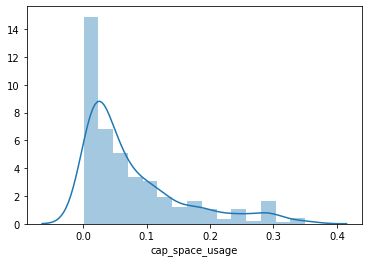

In [58]:
sns.distplot(df['cap_space_usage'])

Split the dataset into training set, validation set, and test set (this is for the final run)

In [7]:
from sklearn.model_selection import train_test_split

In [35]:
X = df.drop(columns=["cap_space_usage"])
y = df["cap_space_usage"]

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=41)
smote_data = smogn.smoter(data = pd.concat([X_train, y_train], axis=1),
                           y = 'cap_space_usage',
                           rel_xtrm_type = 'high',
                           rel_thres = 0.75,
                              k = 9,
                          samp_method = 'extreme',
                         drop_na_col = True,
                        drop_na_row = True)
y_train = smote_data[['cap_space_usage']]
X_train = smote_data.drop(columns=['cap_space_usage'])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.13, random_state=41)

r_index: 100%|##########| 16/16 [00:00<00:00, 222.96it/s]


<AxesSubplot:>

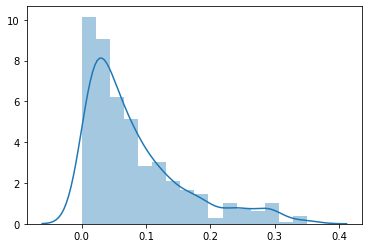

In [144]:
sns.distplot(y_train)

In [9]:
X.to_excel("X.xlsx")
y.to_excel("y.xlsx")

In [145]:
# scale the numerical features only (this leaves out the dummy features from earlier)
from sklearn.preprocessing import StandardScaler
features = numerical
scaler = StandardScaler()

X_train[features] = scaler.fit_transform(X_train[features])
X_test[features] = scaler.transform(X_test[features])
X_val[features] = scaler.transform(X_val[features])

<ipython-input-145-130c03cd7c68>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[features] = scaler.transform(X_test[features])
/home/zach/miniconda3/envs/DataScience/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


# Feature Selection

In [146]:
from sklearn.feature_selection import SelectKBest, f_regression
select = SelectKBest(f_regression, k=20)

best_features = select.fit_transform(X_train, y_train)
feature_scores = pd.concat([pd.Series(X_train.columns), pd.Series(select.scores_)], axis=1)
feature_scores.columns = ["features", "score"]

/home/zach/miniconda3/envs/DataScience/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [37]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [147]:
feature_scores.sort_values(by=["score"], ascending=False)

,features,score
2,Wins Added,585.211586
45,value_over_replacement_player,554.631043
40,offensive_win_shares,465.923354
8,war_total,449.285591
5,poss,402.892805
9,war_reg_season,398.129473
28,minutes_played,371.681778
43,offensive_box_plus_minus,285.188437
41,defensive_win_shares,281.172717
0,O-LEBRON,252.871797


Since this is the baseline model I decided just to use these features and call it a day for now.

In [148]:
features = list(feature_scores.sort_values(by=["score"], ascending=False).head(15)['features'])

In [149]:
X_train = X_train[features]
X_test = X_test[features]
X_val = X_val[features]

In [30]:
X_train.to_excel("training_set.xlsx")
X_test.to_excel("test_set.xlsx")
X_val.to_excel("validation_set.xlsx")

### helper functions

run(model, model_name, x_train, x_val) fits the model on the training set, evaluates the fit on the training set and on the validation set. 

evaluate(y_pred, y_test) prints out the evaluation metrics of a prediction.

In [80]:
def run(model, model_name, x_train, x_val):
    """ Fits the model and prints out results from calling evaluate on the training and validation set
        parameters:
            model
                the unfitted model, from sklearn (has to have a fit and predict method)
            model_name
                String, the name of the model
            x_train
                DataFrame, the training set
            x_val
                DataFrame, the validation set
                
        returns:
            nothing
        
    """
    model = model.fit(x_train, y_train)
    y_pred = np.clip(model.predict(x_train), 0, 1000) # since negative results are meaningless
    
    print("[{0}] These are the results for the training set.".format(model_name))
    
    evaluate(y_pred, y_train)
    print("--------------------------------------")
    
    print("[{0}] These are the results for the validation set.".format(model_name))
    y_pred = np.clip(model.predict(x_val), 0, 1000) # since negative results are meaningless
    
    evaluate(y_pred, y_val)
    
    print("_____________________________________________")

In [81]:
def evaluate(y_pred, y_test):
    """ Prints out the evaluation metrics of the experiment
        parameters:
            y_pred
                DataFrame or array-like, the predictions
            y_test
                DataFrame or array-like, the actual y-values
                
            these two parameters must have the same dimensions
    """
    print("r^2: ", r2_score(y_test, y_pred))
    print("mse: ", mean_squared_error(y_test, y_pred))
    print("variance_score: ", explained_variance_score(y_test, y_pred))
    print("mse-log: ", mean_squared_log_error(y_test, y_pred))

Here I'm trying those five linear models without any tuning and testing the performance.

In [150]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, LassoLarsCV
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_squared_log_error

lstsq = LinearRegression()
ridge = RidgeCV()
lasso = LassoCV(max_iter=5000, random_state = 0)
elasticNet = ElasticNetCV(n_alphas = 1000)
lassoLars = LassoLarsCV()

run(ridge, "Ridge", X_train, X_val)
run(lstsq, "Least Squares", X_train,  X_val)
run(lasso, "Lasso", X_train,  X_val)
run(elasticNet, "ElasticNetCV", X_train,  X_val)
run(lassoLars, "Lasso LARS", X_train,  X_val)

[Ridge] These are the results for the training set.
r^2:  0.6270640306411897
mse:  0.0021560330450506415
variance_score:  0.6270652141541937
mse-log:  0.0017186667876685714
--------------------------------------
[Ridge] These are the results for the validation set.
r^2:  0.514223178509277
mse:  0.003265569925637849
variance_score:  0.522646092752316
mse-log:  0.002558970796581035
_____________________________________________
[Least Squares] These are the results for the training set.
r^2:  0.6290538083692703
mse:  0.002144529658714849
variance_score:  0.6290548716499582
mse-log:  0.0017073500860847065
--------------------------------------
[Least Squares] These are the results for the validation set.
r^2:  0.5106710875957743
mse:  0.003289448383289801
variance_score:  0.517765808953179
mse-log:  0.0025801225132342166
_____________________________________________
[Lasso] These are the results for the training set.
r^2:  0.6187695687624575
mse:  0.002203985335445708
variance_score:  0.61

/home/zach/miniconda3/envs/DataScience/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/zach/miniconda3/envs/DataScience/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[ElasticNetCV] These are the results for the training set.
r^2:  0.6188033848282866
mse:  0.002203789836589681
variance_score:  0.6188034481036704
mse-log:  0.0017592631014944566
--------------------------------------
[ElasticNetCV] These are the results for the validation set.
r^2:  0.519621558660923
mse:  0.0032292800347034135
variance_score:  0.5320696323615297
mse-log:  0.002538161741584001
_____________________________________________
[Lasso LARS] These are the results for the training set.
r^2:  0.6185130795025733
mse:  0.0022054681618970205
variance_score:  0.6185131187956928
mse-log:  0.0017603232195926991
--------------------------------------
[Lasso LARS] These are the results for the validation set.
r^2:  0.5184209970664309
mse:  0.0032373506499806474
variance_score:  0.5308977911173931
mse-log:  0.002543831510738568
_____________________________________________


/home/zach/miniconda3/envs/DataScience/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [151]:
evaluate(lstsq.predict(X_test), y_test)

r^2:  0.6061856526905073
mse:  0.0019539532905239313
variance_score:  0.6152000281512098


ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

Here I'm transforming the datasets to include quadratic features (eecs16b). This means that for feature: points, the PolynomialFeatures transformer will add a column of points-squared to the dataset.

In [84]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_trainPF = poly.fit_transform(X_train)
X_valPF = poly.transform(X_val)
X_valPF = poly.transform(X_val)

lstsq = LinearRegression()
ridge = RidgeCV()
lasso = LassoCV(max_iter=50000, random_state = 0)
elasticNet = ElasticNetCV(max_iter=50000, n_alphas = 1000)
lassoLars = LassoLarsCV()

run(ridge, "Ridge", X_trainPF, X_valPF)
run(lstsq, "Least Squares", X_trainPF, X_valPF)
run(lasso, "Lasso", X_trainPF, X_valPF)
run(elasticNet, "ElasticNetCV", X_trainPF, X_valPF)
run(lassoLars, "Lasso LARS", X_trainPF, X_valPF)

[Ridge] These are the results for the training set.
r^2:  0.7932874116818396
mse:  0.0011953469092273877
variance_score:  0.7932877970849546
mse-log:  0.0009689919799544719
--------------------------------------
[Ridge] These are the results for the validation set.
r^2:  0.6534486578991971
mse:  0.002365270492104977
variance_score:  0.6534517043069517
mse-log:  0.001839755964184997
_____________________________________________
[Least Squares] These are the results for the training set.
r^2:  0.847567200243941
mse:  0.0008814657952656216
variance_score:  0.8475683287990223
mse-log:  0.0007283556499101402
--------------------------------------
[Least Squares] These are the results for the validation set.
r^2:  0.12081313901958723
mse:  0.006000596410094105
variance_score:  0.12476056200503416
mse-log:  0.004548711733501853
_____________________________________________


/home/zach/miniconda3/envs/DataScience/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[Lasso] These are the results for the training set.
r^2:  0.7289196140494273
mse:  0.0015675634664273459
variance_score:  0.7289197530588876
mse-log:  0.0012508523836296042
--------------------------------------
[Lasso] These are the results for the validation set.
r^2:  0.7470571222865509
mse:  0.0017263771688690076
variance_score:  0.7470630595052424
mse-log:  0.001329311323708087
_____________________________________________


/home/zach/miniconda3/envs/DataScience/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[ElasticNetCV] These are the results for the training set.
r^2:  0.728298489198743
mse:  0.0015711552151280444
variance_score:  0.7282986323641552
mse-log:  0.0012535802228081975
--------------------------------------
[ElasticNetCV] These are the results for the validation set.
r^2:  0.7462230475351634
mse:  0.0017320698676353931
variance_score:  0.7462281730552989
mse-log:  0.0013332804953005025
_____________________________________________


/home/zach/miniconda3/envs/DataScience/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[Lasso LARS] These are the results for the training set.
r^2:  0.7322734782518008
mse:  0.0015481692377502562
variance_score:  0.7322736817200837
mse-log:  0.001235080203411712
--------------------------------------
[Lasso LARS] These are the results for the validation set.
r^2:  0.7369577054511383
mse:  0.0017953073668692835
variance_score:  0.7369589318539691
mse-log:  0.0013755299589300026
_____________________________________________


Since these results are much better (except least squares), we're probably going to need to look beyond just linear-models.

**To put the result of baseline model into contexts, we also need to look into data entries manually to do some sanity checks**

In [20]:
train_indexes = X_train.index

In [21]:
sanity_check_train_df = dum_df.iloc[train_indexes][['key', 'cap_space_usage', 'Wins Added', 'value_over_replacement_player',
                                                      'war_total', 'win_shares','salary']]
sanity_check_train_df['val_cap_usage'] = elasticNet.predict(X_trainPF)
sanity_check_train_df['diff'] = sanity_check_train_df['val_cap_usage'] - sanity_check_train_df['cap_space_usage']

In [22]:
training_set = sanity_check_train_df.sort_values('diff', ascending=False)

In [23]:
validation_indexes = X_val.index

In [24]:
sanity_check_val_df = dum_df.iloc[validation_indexes][['key', 'cap_space_usage', 'Wins Added', 'value_over_replacement_player',
                                                      'war_total', 'win_shares']]
sanity_check_val_df['val_cap_usage'] = elasticNet.predict(X_valPF)
sanity_check_val_df['diff'] = sanity_check_val_df['val_cap_usage'] - sanity_check_val_df['cap_space_usage']

In [25]:
validation_set = sanity_check_val_df.sort_values('diff', ascending=False)
validation_set['category'] = validation_set['diff'].apply(lambda x: 'Increase' if x >= 0.015 else 'Decrease' if x <= -0.015 else 'Match')
validation_set['abs_diff'] = abs(validation_set['diff'])

In [26]:
training_set[['key', 'cap_space_usage', 'val_cap_usage', 'diff']].head(25)

,key,cap_space_usage,val_cap_usage,diff
293,Willie Cauley-Stein2019,0.019951,0.141732,0.121781
163,Derrick Rose2017,0.013691,0.110592,0.096901
294,Brook Lopez2019,0.110803,0.197544,0.086741
301,Al-Farouq Aminu2019,0.084827,0.171066,0.086239
230,DeMarcus Cousins2018,0.052391,0.138173,0.085783
12,Zaza Pachulia2016,0.030783,0.110990,0.080207
236,Jeff Green2018,0.023500,0.101944,0.078444
299,Danny Green2019,0.134086,0.203071,0.068985
300,JaVale McGee2019,0.036650,0.104724,0.068074
20,Jared Sullinger2016,0.059781,0.127665,0.067884


In [27]:
validation_set[['key', 'cap_space_usage', 'val_cap_usage', 'diff']].head(25)

,key,cap_space_usage,val_cap_usage,diff
50,Raymond Felton2016,0.016482,0.095273,0.078791
70,Dion Waiters2016,0.030783,0.106745,0.075962
222,Will Barton2018,0.117798,0.192421,0.074622
246,Yogi Ferrell2018,0.029450,0.099550,0.070101
220,Julius Randle2018,0.084825,0.138738,0.053913
171,Rajon Rondo2017,0.033302,0.085727,0.052425
227,Anthony Tolliver2018,0.056445,0.105844,0.049399
321,Dorian Finney-Smith2019,0.036650,0.081912,0.045262
164,Shabazz Muhammad2017,0.012500,0.055788,0.043289
139,Zaza Pachulia2017,0.035094,0.071845,0.036750


**The following is for visualization**

In [28]:
from adjustText import adjust_text

ModuleNotFoundError: No module named 'adjustText'

In [ ]:
sns.set(rc={'figure.figsize':(20, 20)})

In [ ]:
sns.scatterplot(data=training_set, x="value_over_replacement_player", y="val_cap_usage", hue='win_shares',
                size='diff', sizes=(10, 100))
plt.text(training_set['Wins Added'][training_set.key=='Derrick Rose2017'],
         training_set['val_cap_usage'][training_set.key=='Derrick Rose2017'],
         'Derrick Rose2017', 
 fontdict=dict(color='black', alpha=0.5, size=8))

In [ ]:
sns.set(rc={'figure.figsize':(35, 20)}, style='darkgrid')

In [ ]:
sns.scatterplot(data=validation_set, x="value_over_replacement_player", y="val_cap_usage", hue='win_shares',
                size='abs_diff', sizes=(50, 500), style='category')
texts = []
for key in validation_set.key:
    texts.append(plt.text(validation_set['value_over_replacement_player'][validation_set.key==key],
         validation_set['val_cap_usage'][validation_set.key==key],
         key, 
            fontdict=dict(color='black', alpha=1, size=9, ma='center')))
adjust_text(texts, only_move={'texts':'y'})
plt.show()
